In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Từ bảng mô tả trên ta có thể phân tích dữ liệu như sau: 
- Dữ liệu trên có 5 thuộc tính với 50,000 quan sát
- Các thông số khác như: trung bình (mean), độ lệch chuẩn(std),...
- Xuất hiện ngoại lai(outlier): giá min "price" = -36588.165397.
- Lịch sử dữ liệu: 75% dữ liệu giá nhà được xây dưới năm 2003

# Xử lý dữ liệu

Biểu đồ chứa ngoại lai (Price < 0) của giá


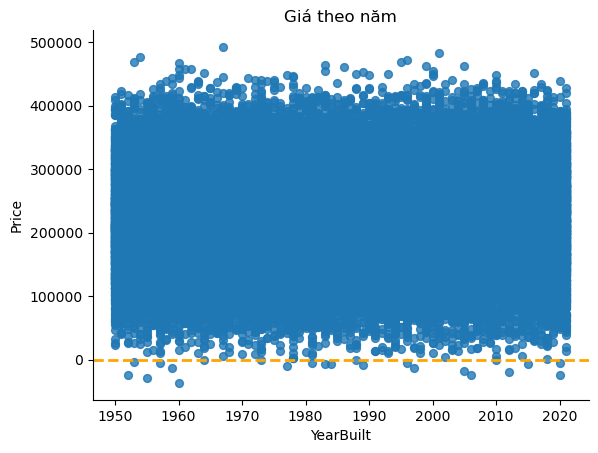

In [ ]:
df.plot(kind='scatter', x='YearBuilt', y='Price', s=32,alpha=.8)
plt.title("Giá theo năm")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.axhline(0, color='orange',linewidth=2, linestyle='--')

Xử lý ngoại lai

In [ ]:
df['Price'] = df['Price'].apply(lambda x: max(0,x)) #Giá trị âm sẽ gán bằng 0
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224832.698026
std,575.513241,1.116326,0.815851,20.719377,76125.257002
min,1000.000000,2.000000,1.000000,1950.000000,0.000000
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Biểu đồ giá sau khi xử lý ngoại lai

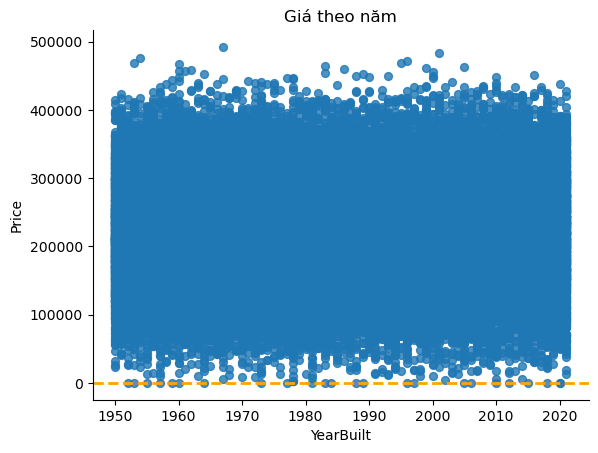

In [ ]:
df.plot(kind='scatter', x='YearBuilt', y='Price', s=32, alpha=.8)
plt.title("Giá theo năm")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.axhline(0, color='orange',linewidth=2, linestyle='--')

Kiểm tra phân phối của dữ liệu

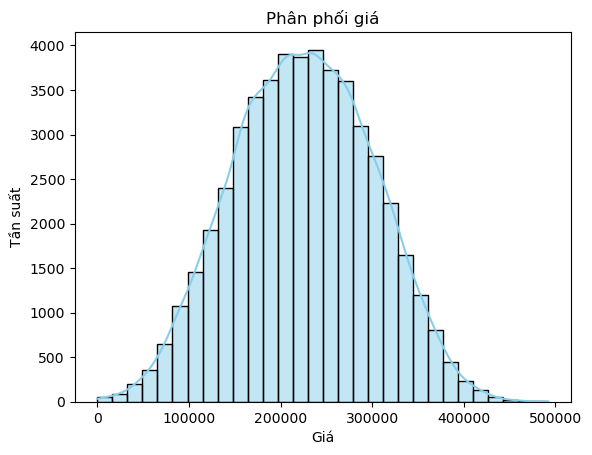

In [ ]:
sns.histplot(df['Price'],kde=True, bins=30, color='skyblue')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.show()

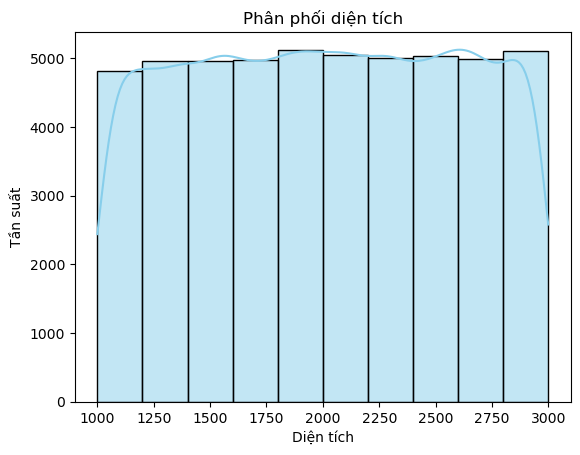

In [ ]:
sns.histplot(df['SquareFeet'], kde=True,bins=10, color='skyblue')
plt.title('Phân phối diện tích')
plt.xlabel('Diện tích')
plt.ylabel('Tần suất')
plt.show()

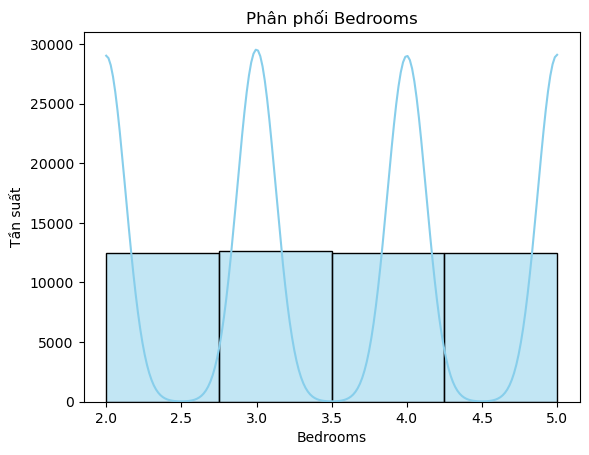

In [ ]:
sns.histplot(df['Bedrooms'], kde=True,bins=4, color='skyblue')
plt.title('Phân phối Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Tần suất')
plt.show()

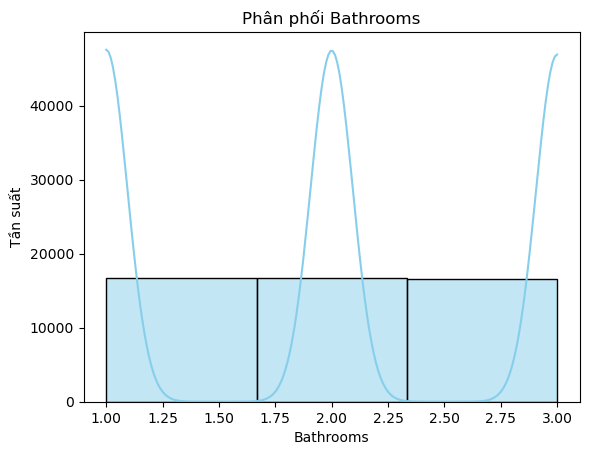

In [ ]:
sns.histplot(df['Bathrooms'], kde=True,bins=3, color='skyblue')
plt.title('Phân phối Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Tần suất')
plt.show()

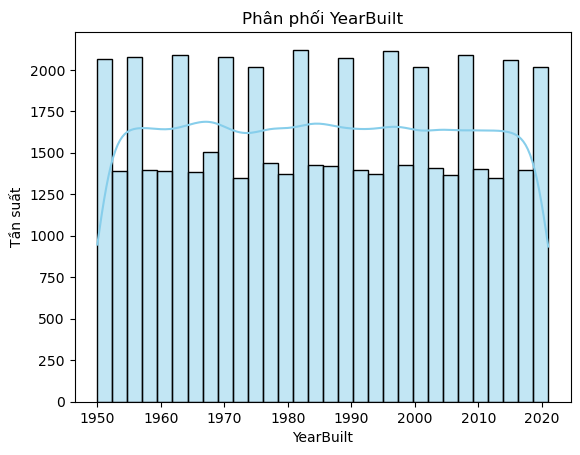

In [ ]:
sns.histplot(df['YearBuilt'], kde=True,bins=30, color='skyblue')
plt.title('Phân phối YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Tần suất')
plt.show()

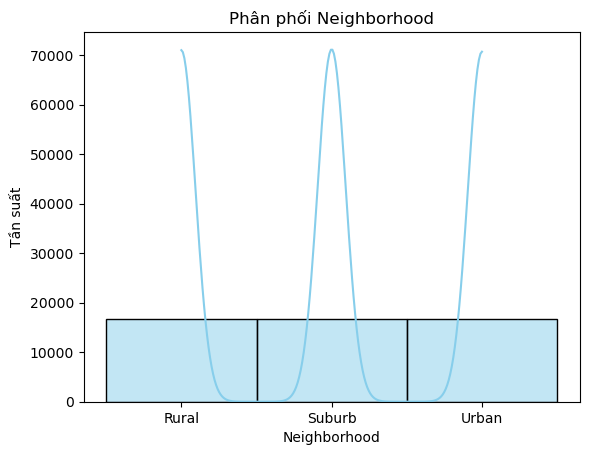

In [ ]:
sns.histplot(df['Neighborhood'], kde=True,bins=30, color='skyblue')
plt.title('Phân phối Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Tần suất')
plt.show()

Chuyển đổi kiểu dữ liệu "Neighborhood"

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Neighborhood'])
df_encoded = df_encoded.astype(int)
df_encoded

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080,1,0,0
49996,2854,2,2,1988,374507,0,1,0
49997,2979,5,3,1962,384110,0,1,0
49998,2596,5,2,1984,380512,1,0,0


Scale dữ liệu

In [ ]:
scaler = StandardScaler()
df_encoded = scaler.fit_transform(df_encoded)
pd.DataFrame(df_encoded)

,0,1,2,3,4,5,6,7
0,0.207861,0.449067,-1.220113,-0.791751,-0.124496,1.413620,-0.708836,-0.705082
1,0.786480,-0.446738,0.005614,-0.260842,-0.391703,1.413620,-0.708836,-0.705082
2,-0.254340,-1.342543,-1.220113,-0.743486,1.077955,-0.707404,1.410763,-0.705082
3,0.499777,-1.342543,-1.220113,0.511390,-0.237062,-0.707404,-0.708836,1.418275
4,0.214811,1.344872,0.005614,0.752713,0.625341,-0.707404,1.410763,-0.705082
...,...,...,...,...,...,...,...,...
49995,-1.258671,1.344872,1.231341,-0.502164,-1.638792,1.413620,-0.708836,-0.705082
49996,1.472831,-1.342543,0.005614,0.125274,1.966184,-0.707404,1.410763,-0.705082
49997,1.690031,1.344872,1.231341,-1.129602,2.092333,-0.707404,1.410763,-0.705082
49998,1.024531,1.344872,0.005614,-0.067784,2.045068,1.413620,-0.708836,-0.705082


Tách đầu ra dự đoán Y(Price) và đầu vào X

In [ ]:
y = df_encoded[:,4]
X = np.delete(df_encoded, 4 ,axis=1)
pd.DataFrame(X), pd.DataFrame(y)

(              0         1         2         3         4         5         6
 0      0.207861  0.449067 -1.220113 -0.791751  1.413620 -0.708836 -0.705082
 1      0.786480 -0.446738  0.005614 -0.260842  1.413620 -0.708836 -0.705082
 2     -0.254340 -1.342543 -1.220113 -0.743486 -0.707404  1.410763 -0.705082
 3      0.499777 -1.342543 -1.220113  0.511390 -0.707404 -0.708836  1.418275
 4      0.214811  1.344872  0.005614  0.752713 -0.707404  1.410763 -0.705082
 ...         ...       ...       ...       ...       ...       ...       ...
 49995 -1.258671  1.344872  1.231341 -0.502164  1.413620 -0.708836 -0.705082
 49996  1.472831 -1.342543  0.005614  0.125274 -0.707404  1.410763 -0.705082
 49997  1.690031  1.344872  1.231341 -1.129602 -0.707404  1.410763 -0.705082
 49998  1.024531  1.344872  0.005614 -0.067784  1.413620 -0.708836 -0.705082
 49999 -0.754768  1.344872  1.231341  1.235357  1.413620 -0.708836 -0.705082
 
 [50000 rows x 7 columns],
               0
 0     -0.124496
 1     -0.391

Chia tập dữ liệu (Train, Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Train model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Kết quả dự đoán từ tập Test

In [ ]:
y_pred = model.predict(X_test)

# Đánh giá mô hình( sai số ^2 tb, sai số tuyệt đối tb, sai số % tuyệt đối tb, hệ số xác định)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')


MSE: 0.4202582632904806
MAE: 0.517930581620164
MAPE: 3.5423774308954306
R2: 0.5756140947525845


Chỉ số R bình phương là 0.57 tức chỉ giải thích được 57% sự biến thiên của y_test.So với ứng dụng thực tế (>0,7)


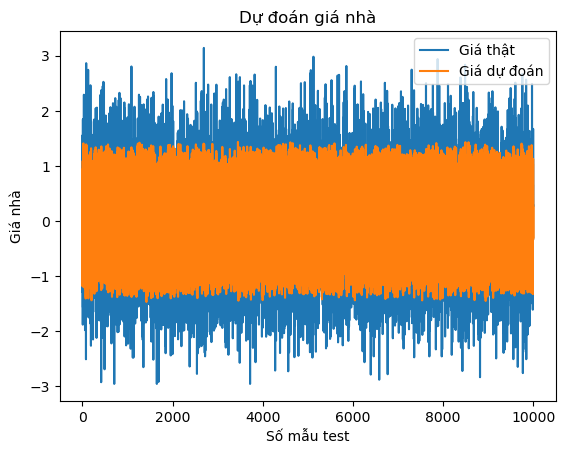

In [ ]:
plt.plot(y_test,label= 'Giá thật')
plt.plot(y_pred, label= 'Giá dự đoán')
plt.xlabel('Số mẫu test')
plt.ylabel('Giá nhà')
plt.title('Dự đoán giá nhà')
plt.legend()
plt.show()

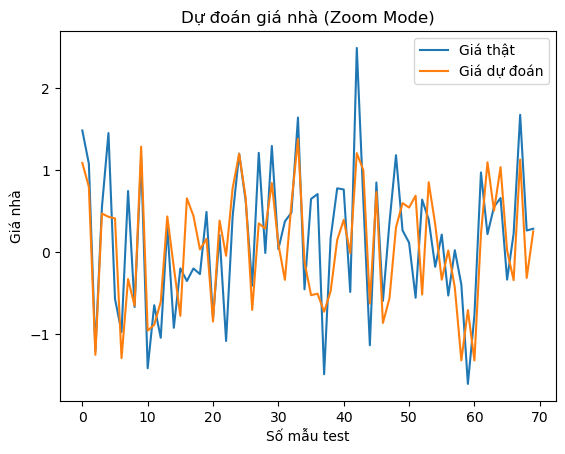

In [ ]:
plt.plot(y_test[-70:],label= 'Giá thật')
plt.plot(y_pred[-70:], label= 'Giá dự đoán')
plt.xlabel('Số mẫu test')
plt.ylabel('Giá nhà')
plt.title('Dự đoán giá nhà (Zoom Mode)')
plt.legend()
plt.show()

# Biểu diễn phương trình hồi quy tuyến tính

In [ ]:
coeffidents = model.coef_
intercept = model.intercept_

equation = f'y = [{intercept:.3f}]'
for i in range(len(coeffidents)):
    equation += f' + [{coeffidents[i]:.3f}]x{i+1}'

#	SquareFeet	Bedrooms	Bathrooms	YearBuilt	Neighborhood_Rural	Neighborhood_Suburb	 Neighborhood_Urban
#   x1          x2          x3          x4          x5                  x6                   x7

print('LinearRegression:', equation)

LinearRegression: y = [-0.000] + [0.751]x1 + [0.077]x2 + [0.032]x3 + [-0.002]x4 + [-0.002]x5 + [-0.005]x6 + [0.007]x7


Dựa vào hệ số phương trình: 
- Biến x1 (SquaredFeet) có tác động dương theo giá (biến x1 tăng thì Price tăng ) và tác động lớn nhất trong các hệ số còn lại(0.751)
- Các biến còn lại cũng có tác động nhưng không đáng kể

In [304]:
# Tạo một điểm dữ liệu mới
new_example = np.array([1121, 5, 2, 2004, 0, 0, 1])

# Định hình lại ví dụ để phù hợp với định dạng đầu vào
new_example = new_example.reshape(1, -1)

# Bắt đầu dự đoán
predicted_price = model.predict(new_example)

predicted_price_in_currency = predicted_price[0] * 100

print("Predicted Price:", predicted_price_in_currency)



Predicted Price: 112378.87866272354
